In [22]:
import numpy as np
import pandas as pd
import yfinance as yf
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
#chosen seven assets
adjclose = yf.download(['AAPL','AMZN','JPM','MS','MSFT','TSLA','TSTRX'], period = '1y')['Adj Close']

[*********************100%***********************]  7 of 7 completed


In [24]:
returns = adjclose.pct_change()*100

In [25]:
#calculate the variance
(adjclose.pct_change()*100).var()

AAPL      4.801666
AMZN      9.210102
JPM       3.201174
MS        3.610182
MSFT      4.849972
TSLA     17.745013
TSTRX     2.162878
dtype: float64

In [26]:
#calculate the mean
returns.mean()

AAPL     0.004111
AMZN    -0.137584
JPM      0.013826
MS       0.035931
MSFT    -0.000233
TSLA    -0.132836
TSTRX   -0.026062
dtype: float64

In [27]:
#correlation matrix with all seven assets
returns.corr()

,AAPL,AMZN,JPM,MS,MSFT,TSLA,TSTRX
AAPL,1.000000,0.706800,0.534515,0.660537,0.794529,0.616826,0.878539
AMZN,0.706800,1.000000,0.485154,0.605595,0.757547,0.551941,0.804152
JPM,0.534515,0.485154,1.000000,0.770815,0.488751,0.384680,0.713587
MS,0.660537,0.605595,0.770815,1.000000,0.604288,0.525405,0.813058
MSFT,0.794529,0.757547,0.488751,0.604288,1.000000,0.496469,0.850903
TSLA,0.616826,0.551941,0.384680,0.525405,0.496469,1.000000,0.610893
TSTRX,0.878539,0.804152,0.713587,0.813058,0.850903,0.610893,1.000000


In [28]:
#yearly returns
annual_return = adjclose.resample('Y').last().pct_change().mean()
annual_return

AAPL     0.271083
AMZN     0.229643
JPM     -0.021085
MS       0.041028
MSFT     0.205163
TSLA     0.684202
TSTRX    0.069750
dtype: float64

In [29]:
#annual standard deviation
annual_sd = adjclose.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
annual_sd

AAPL     0.346304
AMZN     0.482102
JPM      0.282411
MS       0.300113
MSFT     0.348118
TSLA     0.670678
TSTRX    0.232694
dtype: float64

In [30]:
assets = pd.concat([annual_return, annual_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AAPL,0.271083,0.346304
AMZN,0.229643,0.482102
JPM,-0.021085,0.282411
MS,0.041028,0.300113
MSFT,0.205163,0.348118
TSLA,0.684202,0.670678
TSTRX,0.069750,0.232694


In [31]:
covariance_matrix = adjclose.pct_change().apply(lambda x: np.log(1+x)).cov()
covariance_matrix

,AAPL,AMZN,JPM,MS,MSFT,TSLA,TSTRX
AAPL,0.000480,0.000470,0.000209,0.000274,0.000383,0.000574,0.000283
AMZN,0.000470,0.000930,0.000264,0.000349,0.000508,0.000706,0.000360
JPM,0.000209,0.000264,0.000319,0.000261,0.000191,0.000289,0.000187
MS,0.000274,0.000349,0.000261,0.000360,0.000252,0.000420,0.000227
MSFT,0.000383,0.000508,0.000191,0.000252,0.000485,0.000460,0.000275
TSLA,0.000574,0.000706,0.000289,0.000420,0.000460,0.001799,0.000380
TSTRX,0.000283,0.000360,0.000187,0.000227,0.000275,0.000380,0.000217


In [33]:
p_ret = [] #portfolio returns
p_vol = [] #portfolio volatility
p_weights = [] #asset weights
num_assets = len(adjclose.columns)
num_portfolios = 500

In [34]:
#for loop of assets in portfolio and their expected returns
#building the efficient frontier
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, annual_return) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = covariance_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [35]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(adjclose.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [38]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the portfolios created

,Returns,Volatility,AAPL weight,AMZN weight,JPM weight,MS weight,MSFT weight,TSLA weight,TSTRX weight
0,0.250015,0.330806,0.045534,0.075354,0.233599,0.076315,0.234018,0.245375,0.089805
1,0.181120,0.300281,0.049276,0.165174,0.195505,0.029481,0.168042,0.115369,0.277153
2,0.221876,0.315472,0.281310,0.151849,0.189928,0.043254,0.084416,0.127387,0.121856
3,0.253148,0.331869,0.019123,0.122369,0.001177,0.041651,0.133103,0.233153,0.449424
4,0.171743,0.297015,0.241944,0.132559,0.199199,0.212552,0.047098,0.081223,0.085425


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

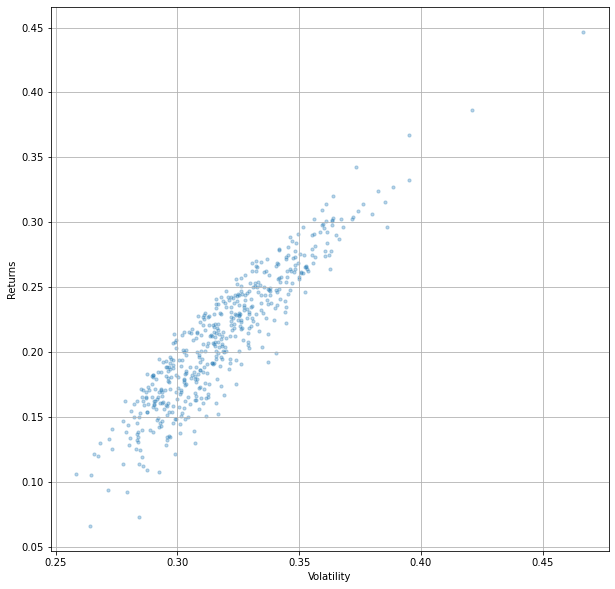

In [39]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [40]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.106357
Volatility      0.258292
AAPL weight     0.106147
AMZN weight     0.006516
JPM weight      0.341892
MS weight       0.058130
MSFT weight     0.171888
TSLA weight     0.038480
TSTRX weight    0.276947
Name: 285, dtype: float64

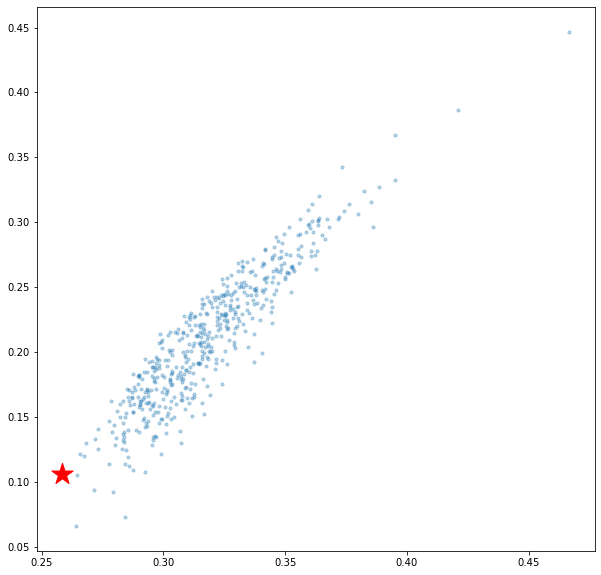

In [41]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [42]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.446641
Volatility      0.466615
AAPL weight     0.033447
AMZN weight     0.008931
JPM weight      0.125269
MS weight       0.046605
MSFT weight     0.140159
TSLA weight     0.589904
TSTRX weight    0.055685
Name: 109, dtype: float64

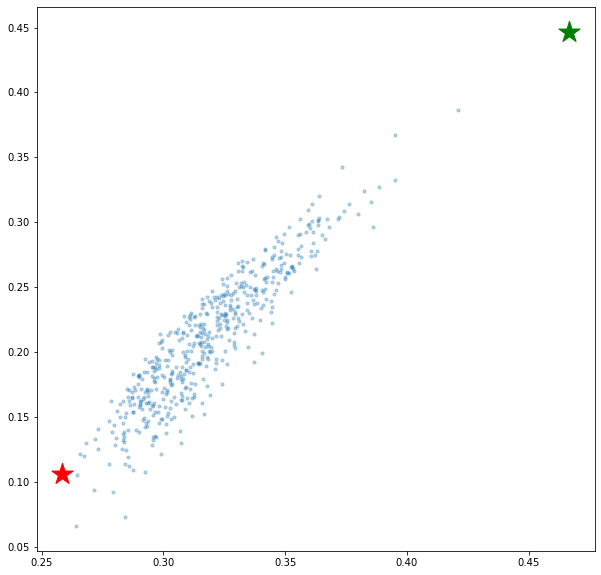

In [43]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)